<a href="https://colab.research.google.com/github/tabaahi07/Deep-Learning/blob/main/Stochastic_and_batch_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Batch gradient descent
# In simple GD we initially choose weights n bias as 1 and calc result and by comparing with actual result from data ,
# calc error and do the same for all the samples in a data. Once we finish doing for all samples this is called 1 epoch.
# Now , we adjust our weights and run many epochs
# This is called Batch GD

# Stochastic Gradient Descent
# But suppose data is too large and many num of samples are there and for single sample there are many attributes , then it'll much much time for 1 epoch
# So in this GD , we calc error for only 1 randomly choosen sample not for all

# Mini batch Gradient Descent
# In this instead of picking 1 random sample , we instead pick a batch of samples so , it'll be working on vectors , so calc will be easy

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [22]:
X = df.drop(['price'] , axis=1 )
X.head()
Y = df['price']
Y.head()

0     39.07
1    120.00
2     62.00
3     75.00
4     51.00
Name: price, dtype: float64

In [23]:
# MinMaxScaling is a data preprocessing technique used to transform the values of the features into a specific range , maily btw 0 to 1
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

x_scaled = sx.fit_transform(X)
y_scaled = sy.fit_transform(Y.values.reshape(df.shape[0] , 1))
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [24]:
#Converting y_scaled into 1D array
y_scaled.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [25]:
# To get w1 * area + w2 * bedrooms
# We'll do the dot product but before that transpose X matrix because
np.ones(2)

array([1., 1.])

In [26]:
x_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [30]:
def batch_gradient_descent(X , y_true , epochs , learning_rate = 0.01 ) :
    num_of_features = X.shape[1]
    total_samples = X.shape[0]
    # creating array of size features
    w = np.ones(shape=(num_of_features))
    b = 0
    # Creating list to store cost per 10th epoch
    epoch_list = []
    cost_list = []

    for i in range(epochs) :
      y_predicted = np.dot(w,X.T) + b
      w_grad = -(2/total_samples) * (X.T.dot(y_true-y_predicted))
      b_grad = -(2/total_samples) * np.sum(y_true-y_predicted)

      # New weights
      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad
      # Cost
      cost = np.mean(np.square(y_true-y_predicted))

      if(i % 10 == 0) :
        epoch_list.append(i)
        cost_list.append(cost)

    return w,b,cost,cost_list , epoch_list

In [31]:
w , b , cost , cost_list , epoch_list = batch_gradient_descent(x_scaled , y_scaled.reshape(y_scaled.shape[0],) , 500)
w , b , cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Text(0, 0.5, 'cost')

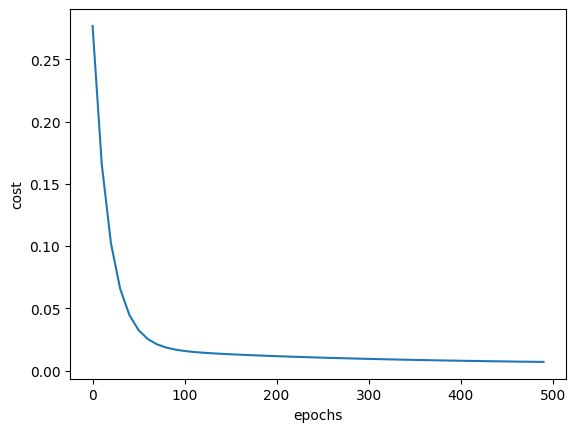

In [32]:
plt.plot(epoch_list , cost_list)
plt.xlabel('epochs')
plt.ylabel('cost')

In [37]:
sy.inverse_transform([[0,1]])
# it'll give maximum output value if input is 1 and mini if input is 0

array([[ 32., 167.]])

In [34]:
# Predict function

def predict(area , bedrooms , w ,b) :
  scaled_X = sx.transform([[area,bedrooms]])[0]
  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]
  # We're doin inverse_transform bcz it'is now btw 0 and 1 only but we want real value so we'll transform it again to real value

In [35]:
predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [40]:
#Random function
import random
random.randint(0,10)

3

In [53]:
#Stochastic_gradient_descent
def stochastic_gradient_descent(X , y_true , epochs , learning_rate = 0.01 ) :
    num_of_features = X.shape[1]
    total_samples = X.shape[0]
    # creating array of size features
    w = np.ones(shape=(num_of_features))
    b = 0
    # Creating list to store cost per 10th epoch
    epoch_list = []
    cost_list = []

    for i in range(epochs) :
      random_index = random.randint(0,total_samples-1)
      sample_x = X[random_index]
      sample_y = y_true[random_index]

      y_predicted = np.dot(w,sample_x.T) + b
      w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y-y_predicted))
      b_grad = -(2/total_samples) * np.sum(sample_y-y_predicted)
      # New weights
      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad
      # Cost
      cost = np.square(sample_y-y_predicted)

      if(i % 100 == 0) :
        epoch_list.append(i)
        cost_list.append(cost)

    return w,b,cost,cost_list , epoch_list

In [56]:
w_sgd , b_sgd , cost_sgd , cost_list_sgd , epoch_list_sgd = stochastic_gradient_descent(x_scaled , y_scaled.reshape(y_scaled.shape[0],) , 10000 )
w_sgd , b_sgd

(array([0.70789064, 0.67433348]), -0.22428569686286826)

Text(0, 0.5, 'cost')

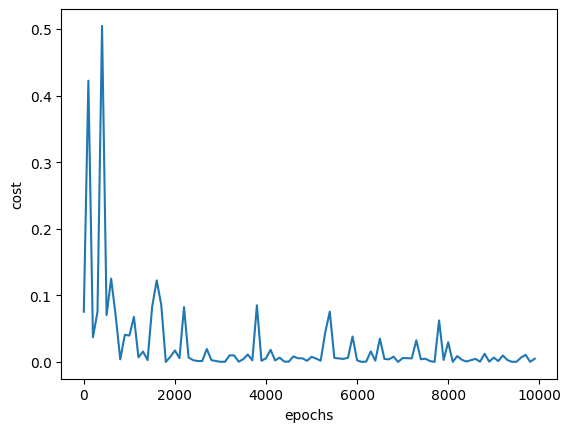

In [57]:
plt.plot(epoch_list_sgd , cost_list_sgd)
plt.xlabel('epochs')
plt.ylabel('cost')

In [58]:
predict(2600,4,w_sgd,b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


129.31404936813217